In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
Toyoto_Corrola = pd.read_csv("/content/Toyoto_Corrola.csv")
Toyoto_Corrola.head()

,Price,Age,KM,HP,Weight
0,13500,23,46986,90,1165
1,13750,23,72937,90,1165
2,13950,24,41711,90,1165
3,14950,26,48000,90,1165
4,13750,30,38500,90,1170


In [ ]:
Toyoto_Corrola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   Age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   Weight  1436 non-null   int64
dtypes: int64(5)
memory usage: 56.2 KB


In [ ]:
Toyoto_Corrola.isna().sum()

Price     0
Age       0
KM        0
HP        0
Weight    0
dtype: int64

In [ ]:
Toyoto_Corrola.corr()

,Price,Age,KM,HP,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.089614
Weight,0.581198,-0.470253,-0.028598,0.089614,1.000000


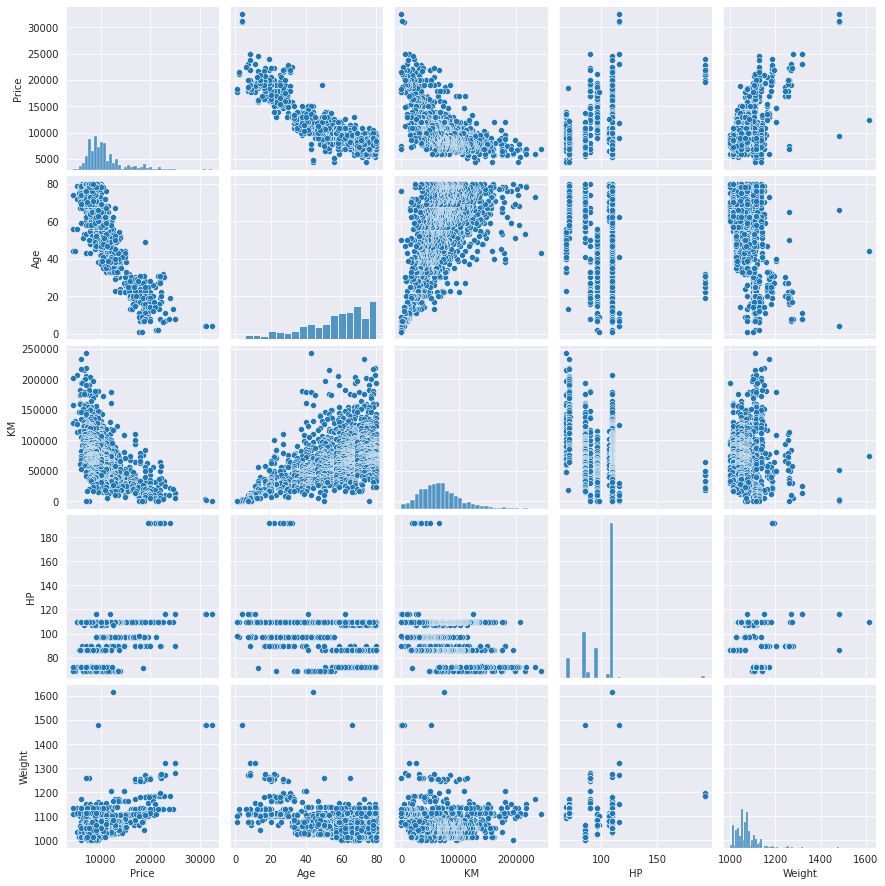

In [ ]:
sns.set_style(style='darkgrid')
sns.pairplot(Toyoto_Corrola)

In [ ]:
import statsmodels.formula.api as smf 
model = smf.ols('Price~KM+Age+HP+Weight',data=Toyoto_Corrola).fit()

In [ ]:
model.params

Intercept   -4014.641772
KM             -0.019647
Age          -122.424469
HP             30.211927
Weight         18.531868
dtype: float64

In [ ]:
print(model.tvalues, '\n', model.pvalues)

Intercept    -4.288944
KM          -16.271222
Age         -46.667723
HP           11.897013
Weight       23.083602
dtype: float64 
 Intercept     1.915580e-05
KM            9.483418e-55
Age          9.862892e-290
HP            3.433587e-31
Weight       1.766938e-100
dtype: float64


In [ ]:
(model.rsquared,model.rsquared_adj)

(0.8617758687562083, 0.8613894980189789)

In [ ]:
ml_v=smf.ols('Price~KM',data = Toyoto_Corrola).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept    88.510378
KM          -26.267601
dtype: float64 
 Intercept     0.000000e+00
KM           1.757913e-124
dtype: float64


In [ ]:
ml_w=smf.ols('Price~Weight',data = Toyoto_Corrola).fit()  
print(ml_w.tvalues, '\n', ml_w.pvalues)  

Intercept   -20.263590
Weight       27.045855
dtype: float64 
 Intercept     1.739508e-80
Weight       1.630487e-130
dtype: float64


In [ ]:
ml_wv=smf.ols('Price~Age+HP',data = Toyoto_Corrola).fit()  
print(ml_wv.tvalues, '\n', ml_wv.pvalues)

Intercept    45.367488
Age         -71.038020
HP           15.259124
dtype: float64 
 Intercept    2.220616e-279
Age           0.000000e+00
HP            7.928093e-49
dtype: float64


In [ ]:
rsq_hp = smf.ols('HP~Weight+KM+Age',data=Toyoto_Corrola).fit().rsquared  
vif_hp = 1/(1-rsq_hp) # 16.33

rsq_weight = smf.ols('Weight~HP+Age+KM',data=Toyoto_Corrola).fit().rsquared  
vif_weight = 1/(1-rsq_weight) # 564.98

rsq_km = smf.ols('KM~Weight+Age+HP',data=Toyoto_Corrola).fit().rsquared  
vif_km = 1/(1-rsq_km) #  564.84

rsq_age = smf.ols('Age~Weight+KM+HP',data=Toyoto_Corrola).fit().rsquared  
vif_age = 1/(1-rsq_age) #  16.35

# Storing vif values in a data frame
d1 = {'Variables':['Hp','Weight','KM','Age'],'VIF':[vif_hp,vif_weight,vif_km,vif_age]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Hp,1.139033
1,Weight,1.405564
2,KM,1.614165
3,Age,1.873690


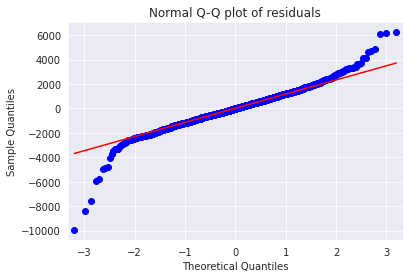

In [ ]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [ ]:
list(np.where(model.resid>10))

[array([   6,    7,    8,   10,   13,   14,   15,   16,   17,   18,   19,
          20,   21,   22,   23,   24,   26,   27,   28,   29,   32,   35,
          36,   38,   41,   43,   45,   46,   47,   48,   49,   51,   52,
          53,   56,   58,   59,   61,   62,   63,   64,   65,   66,   68,
          69,   70,   72,   74,   75,   76,   77,   78,   80,   81,   83,
          84,   85,   89,   90,   91,   92,   94,   95,   98,   99,  100,
         102,  103,  104,  105,  106,  107,  108,  109,  110,  111,  112,
         113,  114,  115,  116,  118,  119,  120,  121,  123,  125,  127,
         128,  134,  136,  138,  139,  141,  142,  143,  144,  146,  147,
         148,  149,  150,  151,  152,  153,  154,  156,  157,  158,  159,
         160,  161,  162,  163,  165,  166,  167,  168,  169,  170,  171,
         172,  173,  174,  175,  176,  177,  178,  179,  180,  181,  182,
         183,  190,  194,  196,  197,  201,  204,  210,  211,  216,  223,
         230,  232,  233,  237,  238, 

In [ ]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

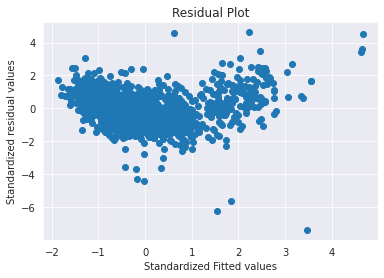

In [ ]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

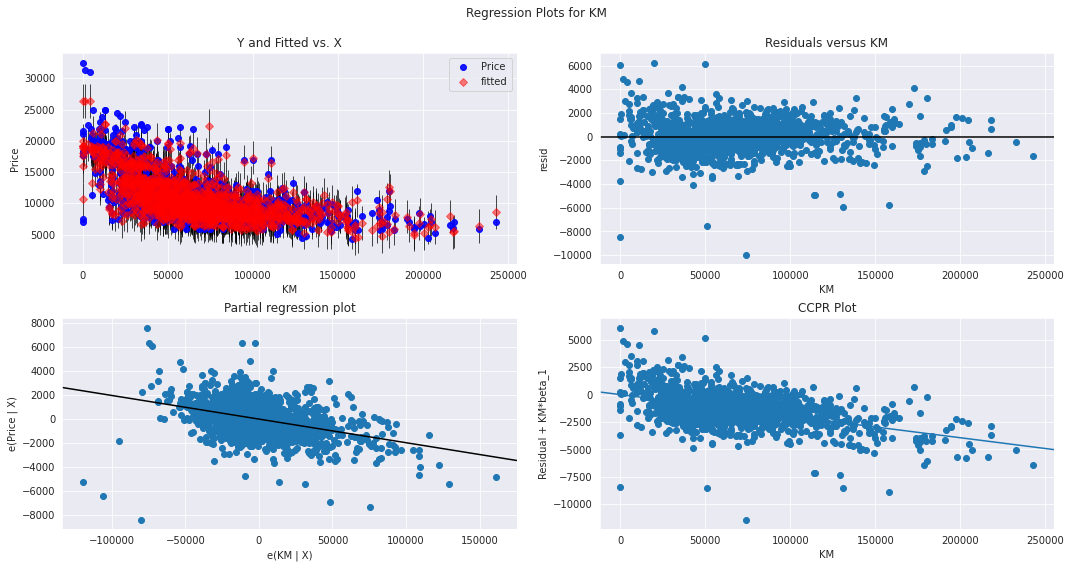

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

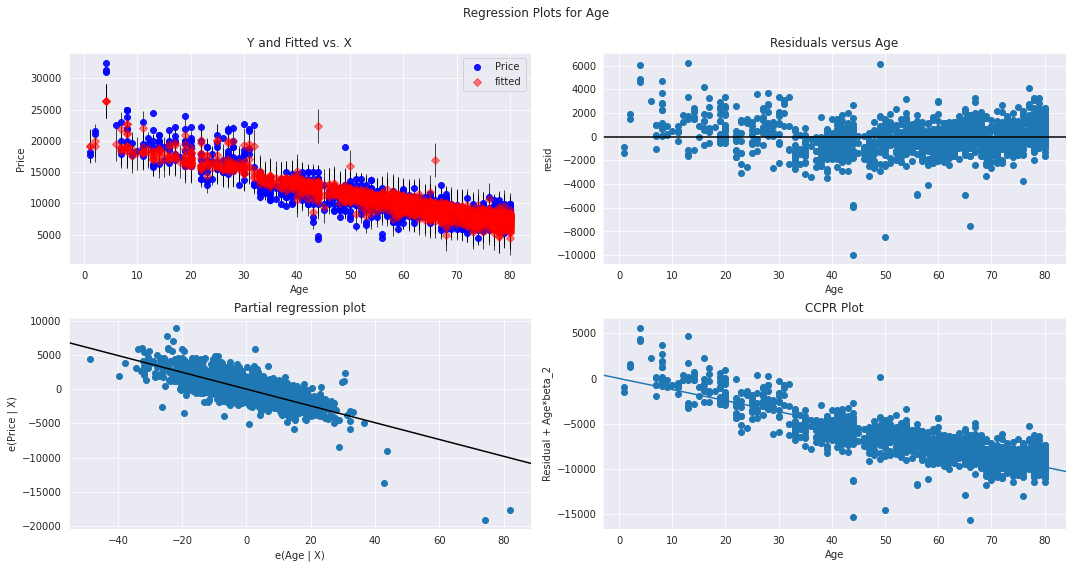

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age", fig=fig)
plt.show()

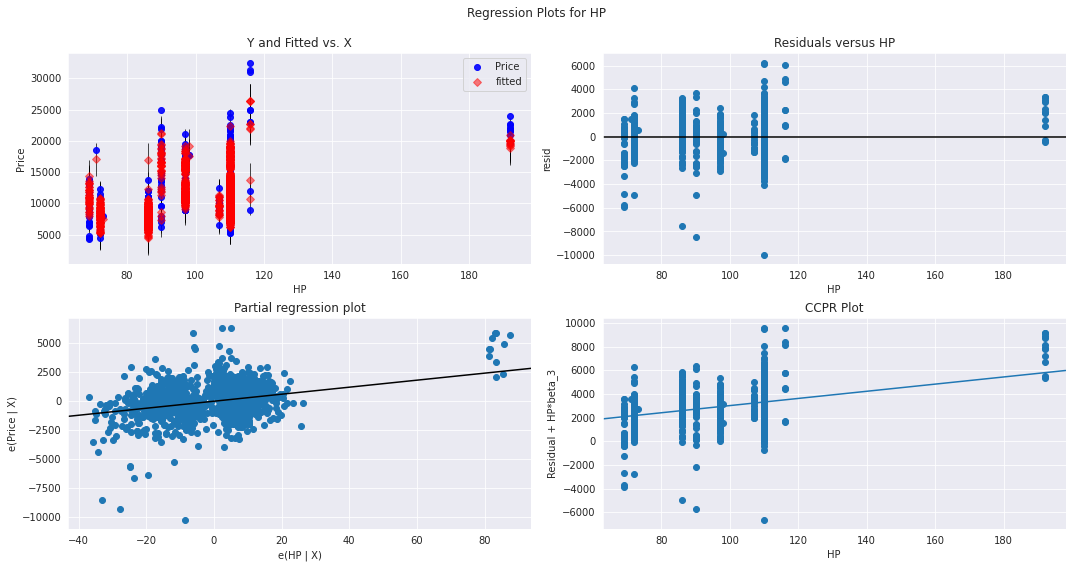

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

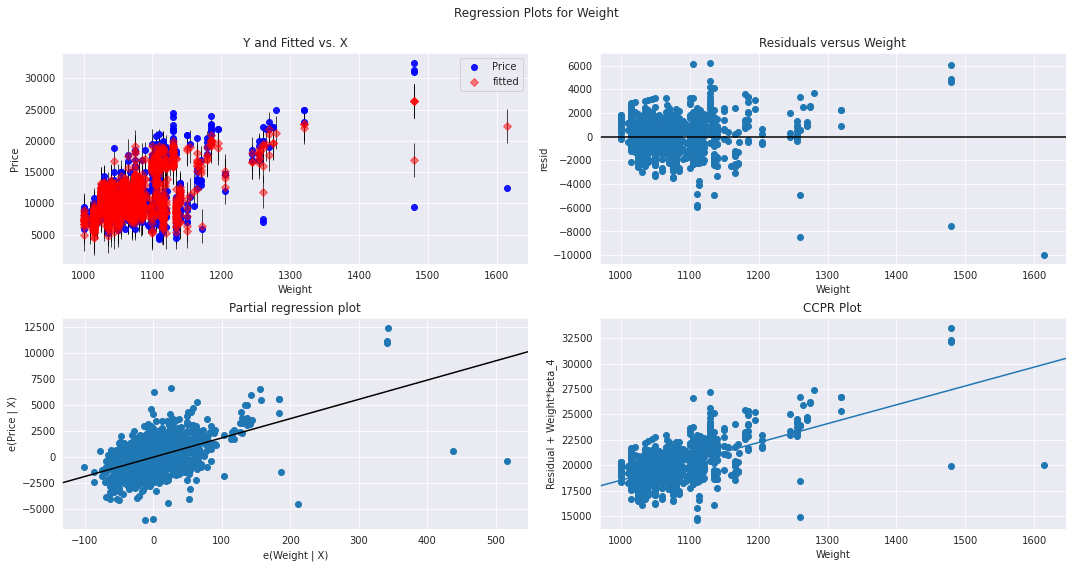

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

In [ ]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


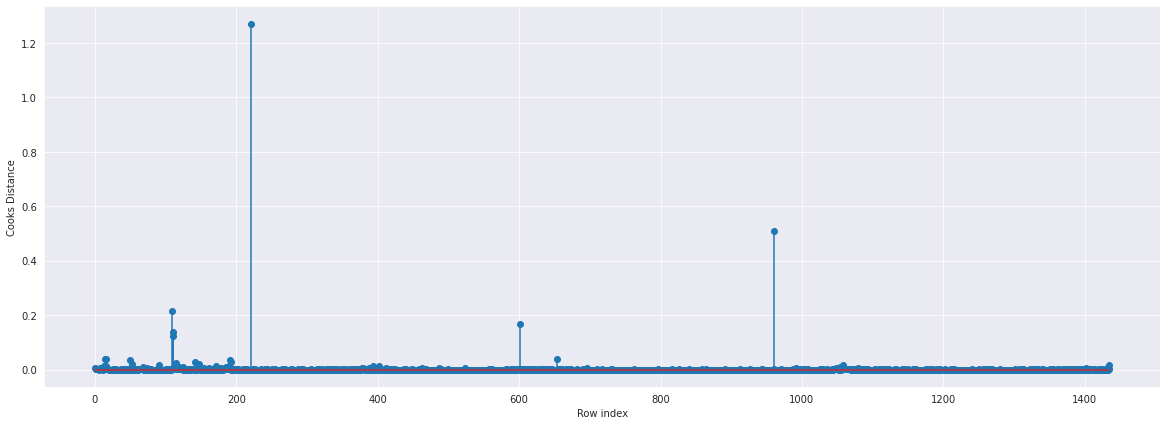

In [ ]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(Toyoto_Corrola)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
(np.argmax(c),np.max(c))

(221, 1.2699400109577244)

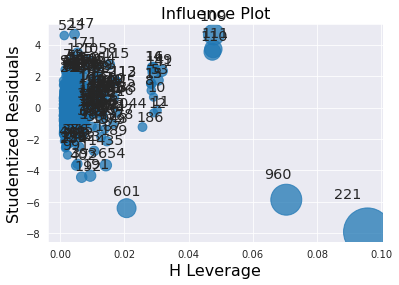

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [ ]:
k = Toyoto_Corrola.shape[1]
n = Toyoto_Corrola.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [ ]:
leverage_cutoff

0.01253481894150418

In [ ]:
Toyoto_Corrola[Toyoto_Corrola.index.isin([70, 76])]

,Price,Age,KM,HP,Weight
70,15950,28,29206,97,1110
76,18750,31,25266,110,1130


In [ ]:
Toyoto_Corrola.head()

,Price,Age,KM,HP,Weight
0,13500,23,46986,90,1165
1,13750,23,72937,90,1165
2,13950,24,41711,90,1165
3,14950,26,48000,90,1165
4,13750,30,38500,90,1170


In [ ]:
Toyoto_Corrola_new = pd.read_csv("/content/Toyoto_Corrola.csv")

In [ ]:
Toyoto_Corrola_new=Toyoto_Corrola_new.drop(Toyoto_Corrola_new.index[[70,76]],axis=0).reset_index()

In [ ]:
Toyoto_Corrola_new=Toyoto_Corrola_new.drop(['index'],axis=1)

In [ ]:
Toyoto_Corrola_new

,Price,Age,KM,HP,Weight
0,13500,23,46986,90,1165
1,13750,23,72937,90,1165
2,13950,24,41711,90,1165
3,14950,26,48000,90,1165
4,13750,30,38500,90,1170
...,...,...,...,...,...
1429,7500,69,20544,86,1025
1430,10845,72,19000,86,1015
1431,8500,71,17016,86,1015
1432,7250,70,16916,86,1015


In [67]:
final_ml_V= smf.ols('Price~Age+KM+HP',data = Toyoto_Corrola_new).fit()

In [68]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.8100013398442902, 25196.59827980234)

In [ ]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


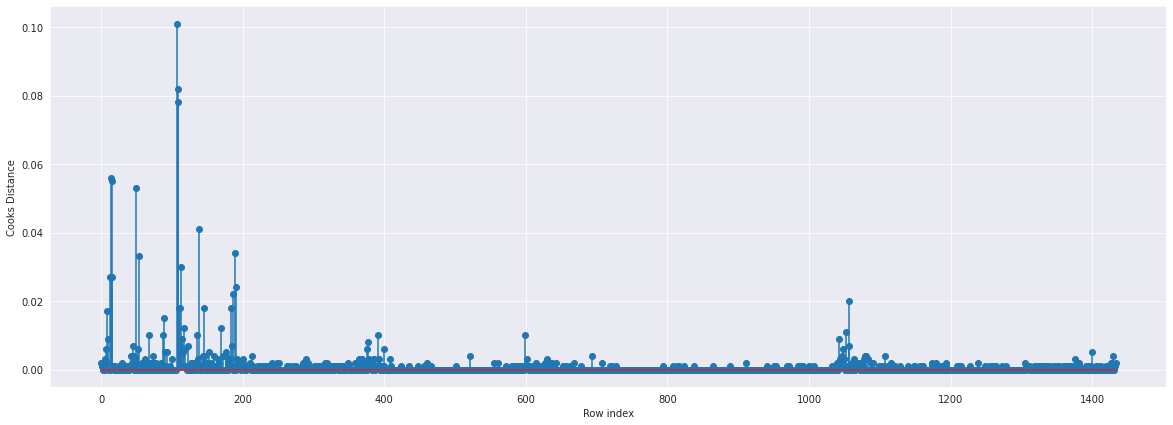

In [ ]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(Toyoto_Corrola_new)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [ ]:
(np.argmax(c_V),np.max(c_V))

(107, 0.10097997877740955)

In [ ]:
Toyoto_Corrola2=Toyoto_Corrola_new.drop(Toyoto_Corrola_new.index[[76,77]],axis=0)

In [ ]:
Toyoto_Corrola2

,Price,Age,KM,HP,Weight
0,13500,23,46986,90,1165
1,13750,23,72937,90,1165
2,13950,24,41711,90,1165
3,14950,26,48000,90,1165
4,13750,30,38500,90,1170
...,...,...,...,...,...
1429,7500,69,20544,86,1025
1430,10845,72,19000,86,1015
1431,8500,71,17016,86,1015
1432,7250,70,16916,86,1015


In [ ]:
Toyoto_Corrola3=Toyoto_Corrola2.reset_index()

In [ ]:
Toyoto_Corrola4=Toyoto_Corrola3.drop(['index'],axis=1)

In [ ]:
Toyoto_Corrola4

,Price,Age,KM,HP,Weight
0,13500,23,46986,90,1165
1,13750,23,72937,90,1165
2,13950,24,41711,90,1165
3,14950,26,48000,90,1165
4,13750,30,38500,90,1170
...,...,...,...,...,...
1427,7500,69,20544,86,1025
1428,10845,72,19000,86,1015
1429,8500,71,17016,86,1015
1430,7250,70,16916,86,1015


In [ ]:
final_ml_V= smf.ols('Price~KM+Age+HP',data = Toyoto_Corrola4).fit()

In [ ]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


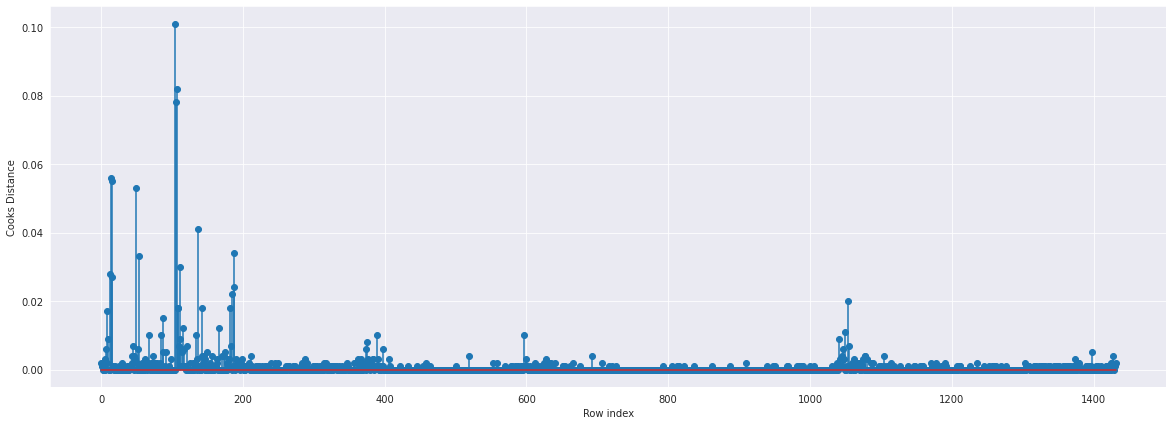

In [ ]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(Toyoto_Corrola4)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [ ]:
(np.argmax(c_V),np.max(c_V))

(105, 0.10135377190381462)

In [ ]:
final_ml_V= smf.ols('Price~KM+Age+HP',data = Toyoto_Corrola4).fit()

In [ ]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.8095120999052439, 25162.90092181221)

In [ ]:
new_data=pd.DataFrame({'HP':90,"KM":100000,"Age":24,"Weight":1100},index=[1])

In [69]:
final_ml_V.predict(new_data)

1    14882.437524
dtype: float64